Pipeline

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import copy
import argparse
import gudhi
import matplotlib.pyplot as plt

In [10]:
#Lee el archivo FASTA y manda los nombres y secuencias a un diccionario
with open('nextclade.aligned.fasta') as f:
  sequences = {} #inicializa el diccionario
  name = None
  for line in f:
    line = line.strip()
    if line.startswith('>'):  
      name = line[1:]
      sequences[name] = ''
    else:
      sequences[name] += line

In [11]:
#Imprime los nombres de las secuencias encontradas.
print("Secuencias:")
i = 1
for name in sequences.keys():
  print(str(i)+' '+name)
  i=i+1

Secuencias:
1 BA.2.10.1_hCoV-19/Mexico/QUE-LANGEBIO_IMSS_14092/2023|EPI_ISL_16968470|2023-01-13
2 BA.2.75.2_hCoV-19/Mexico/CMX_IBT_IMSS_9908/2022|EPI_ISL_15671212|2022-10-07
3 BA.2.10.1_hCoV-19/Mexico/HID-INMEGEN-70-132/2022|EPI_ISL_12666024|2022-05-01
4 BA.2.75.2_hCoV-19/Mexico/CMX-INMEGEN-95-310/2022|EPI_ISL_16278985|2022-12-12
5 BA.2.75.2_hCoV-19/Mexico/MEX-INMEGEN-92x-18/2022|EPI_ISL_15608996|2022-09-25
6 BA.2_hCoV-19/Mexico/BCN_CIAD-IMSS_202201050913/2022|EPI_ISL_12533151|2022-04-19
7 BA.2_hCoV-19/Mexico/MEX_InDRE_FB13911_E_S13150/2022|EPI_ISL_12739324|2022-04-16
8 BA.2_hCoV-19/Mexico/SIN_CIAD-MZT_HJ6105/2022|EPI_ISL_13368395|2022-05-25
9 XBB.1_hCoV-19/Mexico/TAM_LANGEBIO_IMSS_13849/2022|EPI_ISL_16861713|2022-12-19
10 XBB.1_hCoV-19/Mexico/TAM_LANGEBIO_IMSS_13854/2022|EPI_ISL_16861711|2022-12-19
11 XBB.1_hCoV-19/Mexico/VER-LANGEBIO_IMSS_13979/2023|EPI_ISL_16968355|2023-01-23


In [12]:
updated_ranges = [
  (266,13468),
  (13468,21555),
  (21563,25384),
  (25393,26220),
  (26245,26472),
  (26523,27191),
  (27202,27387),
  (27394,27759),
  (27756,27887),
  (27894,28259),
  (28284,28577),
  (28274,29533)
]
matriz_vector = []

In [13]:
for start, end in updated_ranges:

  print(f"\nRango: {start}-{end}")
  
  num_seqs = len(sequences)
  dist_matrix = np.zeros((num_seqs, num_seqs))

  for i in range(num_seqs):
    for j in range(i+1, num_seqs):
      # Usamos list(sequences.items()) para convertir el diccionario a una lista de tuplas (nombre, secuencia)
      name1, seq1 = list(sequences.items())[i]
      name2, seq2 = list(sequences.items())[j]

      diff_count = 0
      for k in range(start, end):
        # Para cada par de secuencias, cuenta el número de diferencias (mutaciones) entre ellas en los rangos especificados.
        # if seq1[k] != seq2[k] and seq2[k] != '-':
        if seq1[k] != seq2[k] and seq1[k]!= 'N' and seq2[k]!= 'N':
          diff_count += 1
      
      #Guarda las distancias en la matriz de distancia simétrica
      dist_matrix[i,j] = diff_count
      dist_matrix[j,i] = diff_count

  print(dist_matrix)
  matriz_vector.append(dist_matrix)


Rango: 266-13468
[[ 0.  9.  2. 12. 13.  3.  2.  4.  2.  3.  4.]
 [ 9.  0.  9.  7.  8. 10.  9. 11.  9. 10. 11.]
 [ 2.  9.  0. 12. 13.  3.  2.  4.  2.  3.  4.]
 [12.  7. 12.  0. 11. 13. 12. 14. 12. 13. 14.]
 [13.  8. 13. 11.  0. 14. 13. 15. 13. 14. 15.]
 [ 3. 10.  3. 13. 14.  0.  3.  5.  3.  4.  5.]
 [ 2.  9.  2. 12. 13.  3.  0.  4.  2.  3.  4.]
 [ 4. 11.  4. 14. 15.  5.  4.  0.  4.  5.  6.]
 [ 2.  9.  2. 12. 13.  3.  2.  4.  0.  1.  2.]
 [ 3. 10.  3. 13. 14.  4.  3.  5.  1.  0.  3.]
 [ 4. 11.  4. 14. 15.  5.  4.  6.  2.  3.  0.]]

Rango: 13468-21555
[[ 0.  7.  7. 12.  6.  8.  8.  7.  2.  2.  3.]
 [ 7.  0.  3.  7.  2.  3.  3.  3.  6.  6.  7.]
 [ 7.  3.  0.  8.  3.  2.  2.  2.  5.  5.  6.]
 [12.  7.  8.  0.  7.  8.  8.  8. 11. 11. 12.]
 [ 6.  2.  3.  7.  0.  3.  3.  3.  6.  6.  7.]
 [ 8.  3.  2.  8.  3.  0.  2.  2.  7.  7.  8.]
 [ 8.  3.  2.  8.  3.  2.  0.  2.  7.  7.  8.]
 [ 7.  3.  2.  8.  3.  2.  2.  0.  7.  7.  8.]
 [ 2.  6.  5. 11.  6.  7.  7.  7.  0.  0.  1.]
 [ 2.  6.  5. 11.  6.

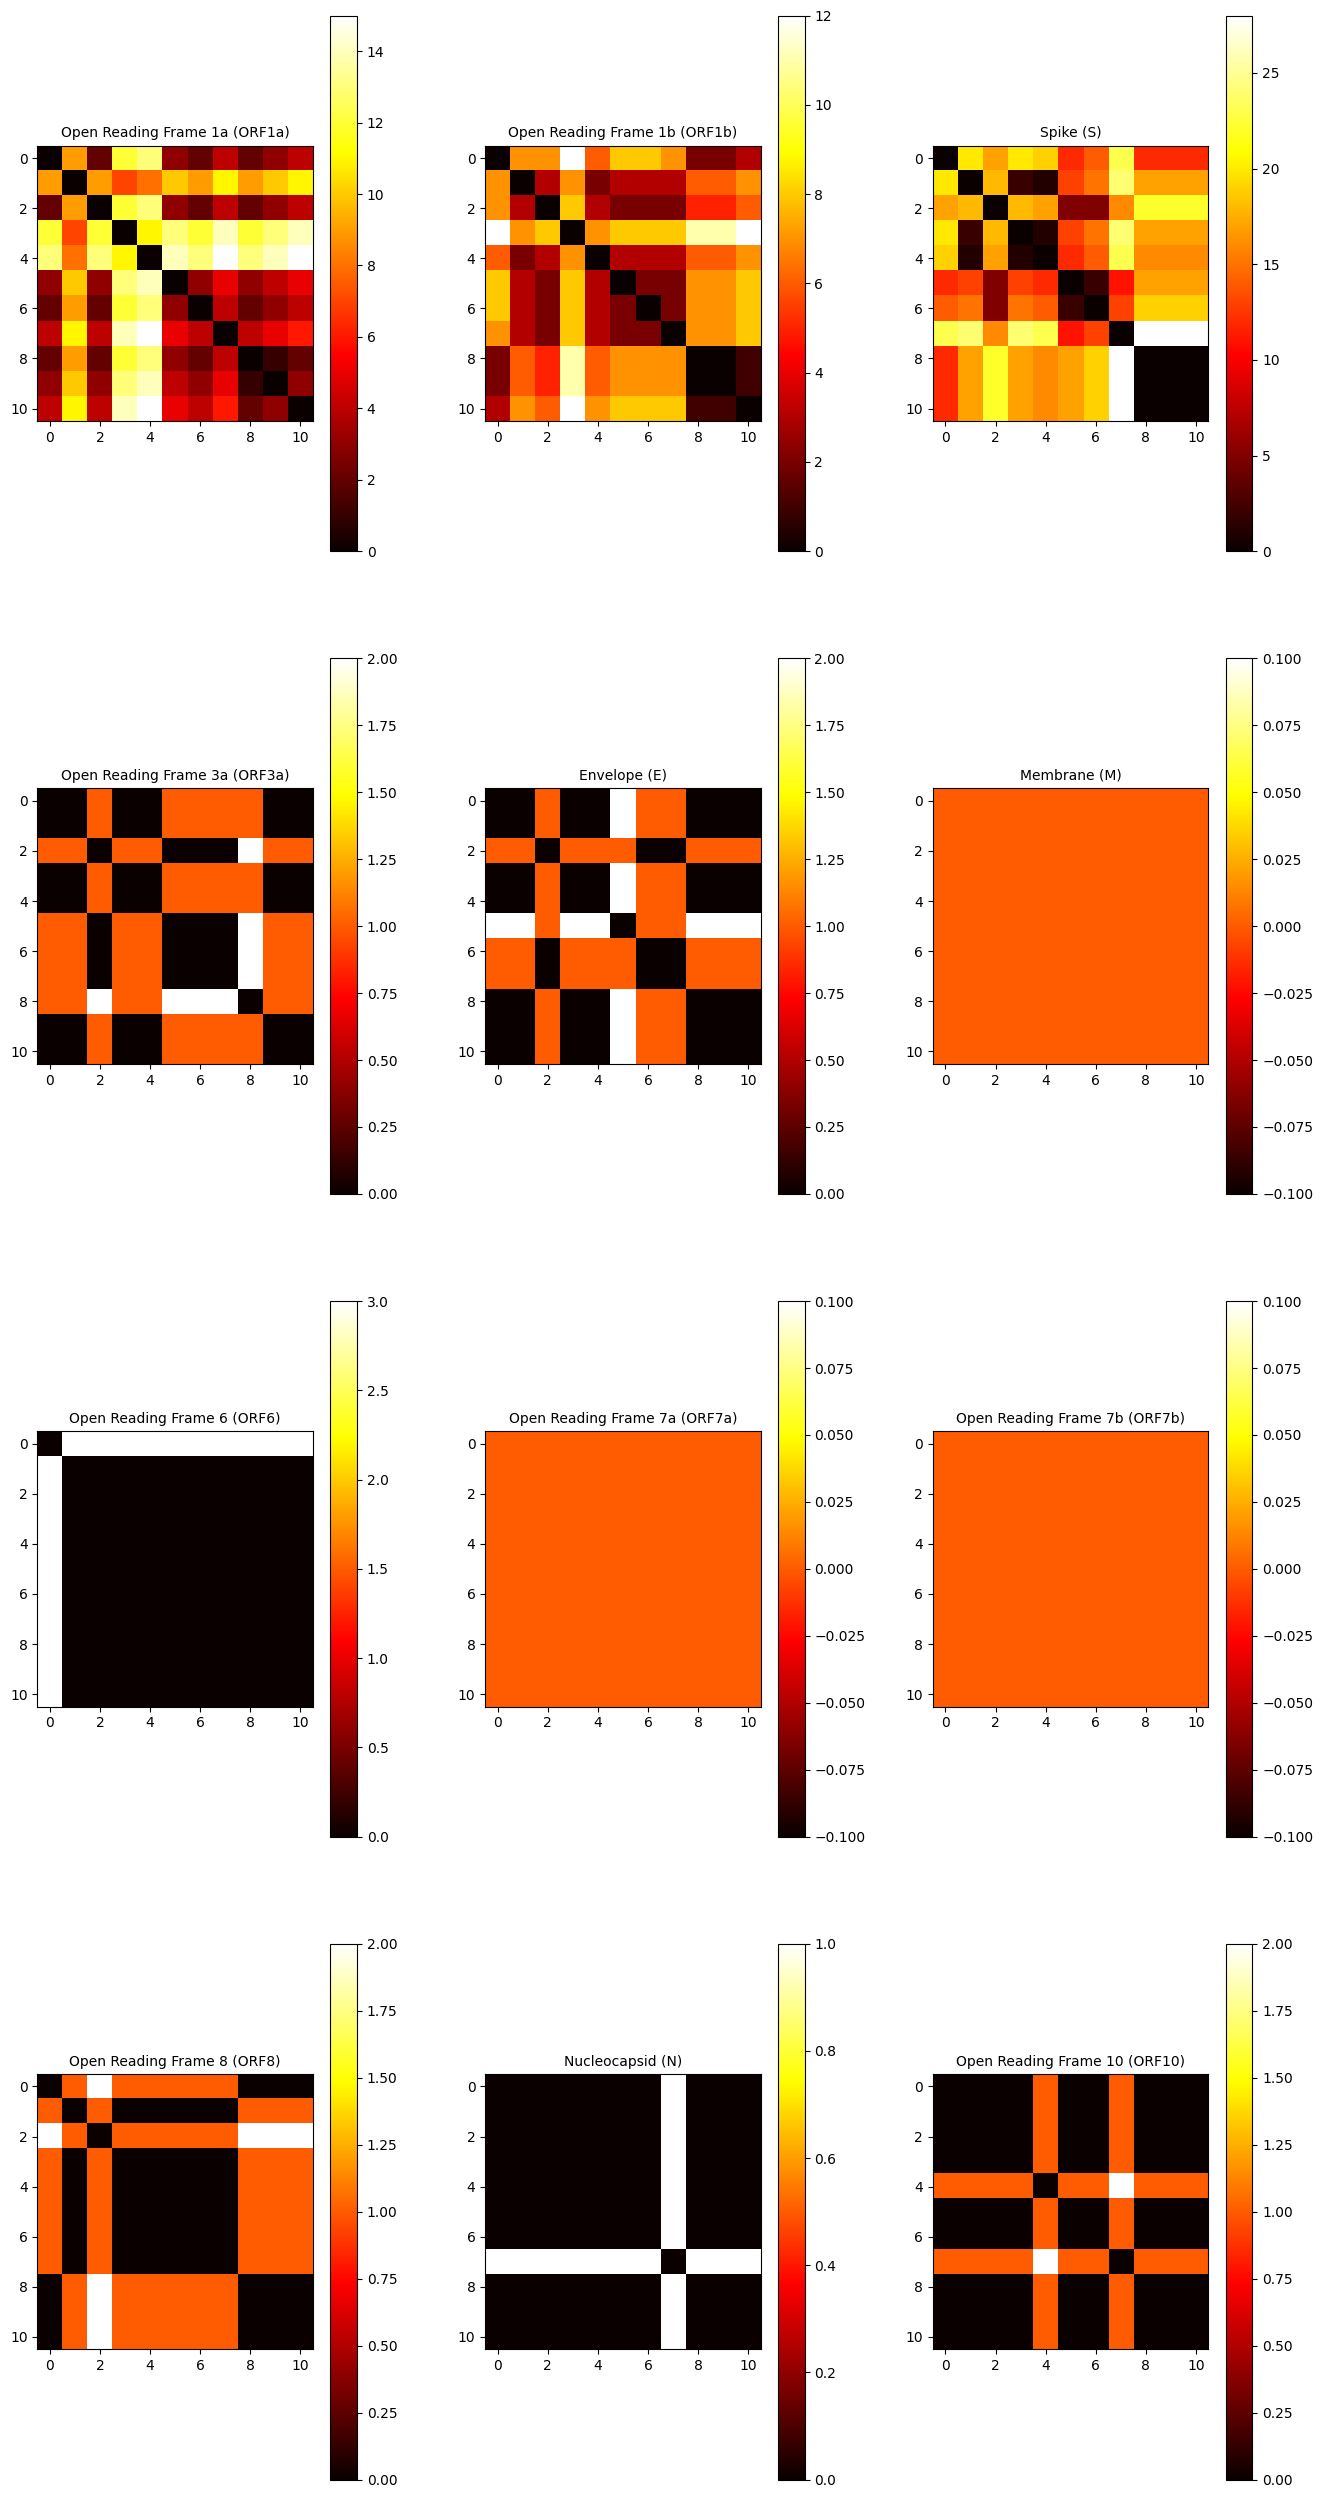

In [14]:
# Lista de nombres completos de proteínas COVID-19
proteinas_covid = [
    'Open Reading Frame 1a (ORF1a)',
    'Open Reading Frame 1b (ORF1b)',
    'Spike (S)',
    'Open Reading Frame 3a (ORF3a)',
    'Envelope (E)',
    'Membrane (M)',
    'Open Reading Frame 6 (ORF6)',
    'Open Reading Frame 7a (ORF7a)',
    'Open Reading Frame 7b (ORF7b)',
    'Open Reading Frame 8 (ORF8)',
    'Nucleocapsid (N)',
    'Open Reading Frame 10 (ORF10)'
]

# Crea una figura con 3 filas y 4 columnas
fig, axs = plt.subplots(4, 3, figsize=(16, 32))

# Itera sobre cada matriz de distancia y subplot
for i, dist_matrix in enumerate(matriz_vector):
    row, col = i // 3, i % 3  # Calcula la fila y columna correspondientes
    
    # Grafica la matriz de distancia como una gráfica de calor
    im = axs[row, col].imshow(dist_matrix, cmap='hot')
    
    # Personaliza el subplot
    axs[row, col].set_title(f'{proteinas_covid[i]}', fontsize=10, wrap=True)
    
    # Agrega una barra de colores
    fig.colorbar(im, ax=axs[row, col])

# Ajusta el espaciado entre subplots
plt.subplots_adjust(wspace=.3, hspace=.2)

# Guarda la figura
plt.savefig('mapa_calor_covid_segmentos.png', dpi=300, bbox_inches='tight')

# Muestra la figura (opcional, solo si quieres verla en pantalla)
plt.show()

usetex mode requires dvipng.


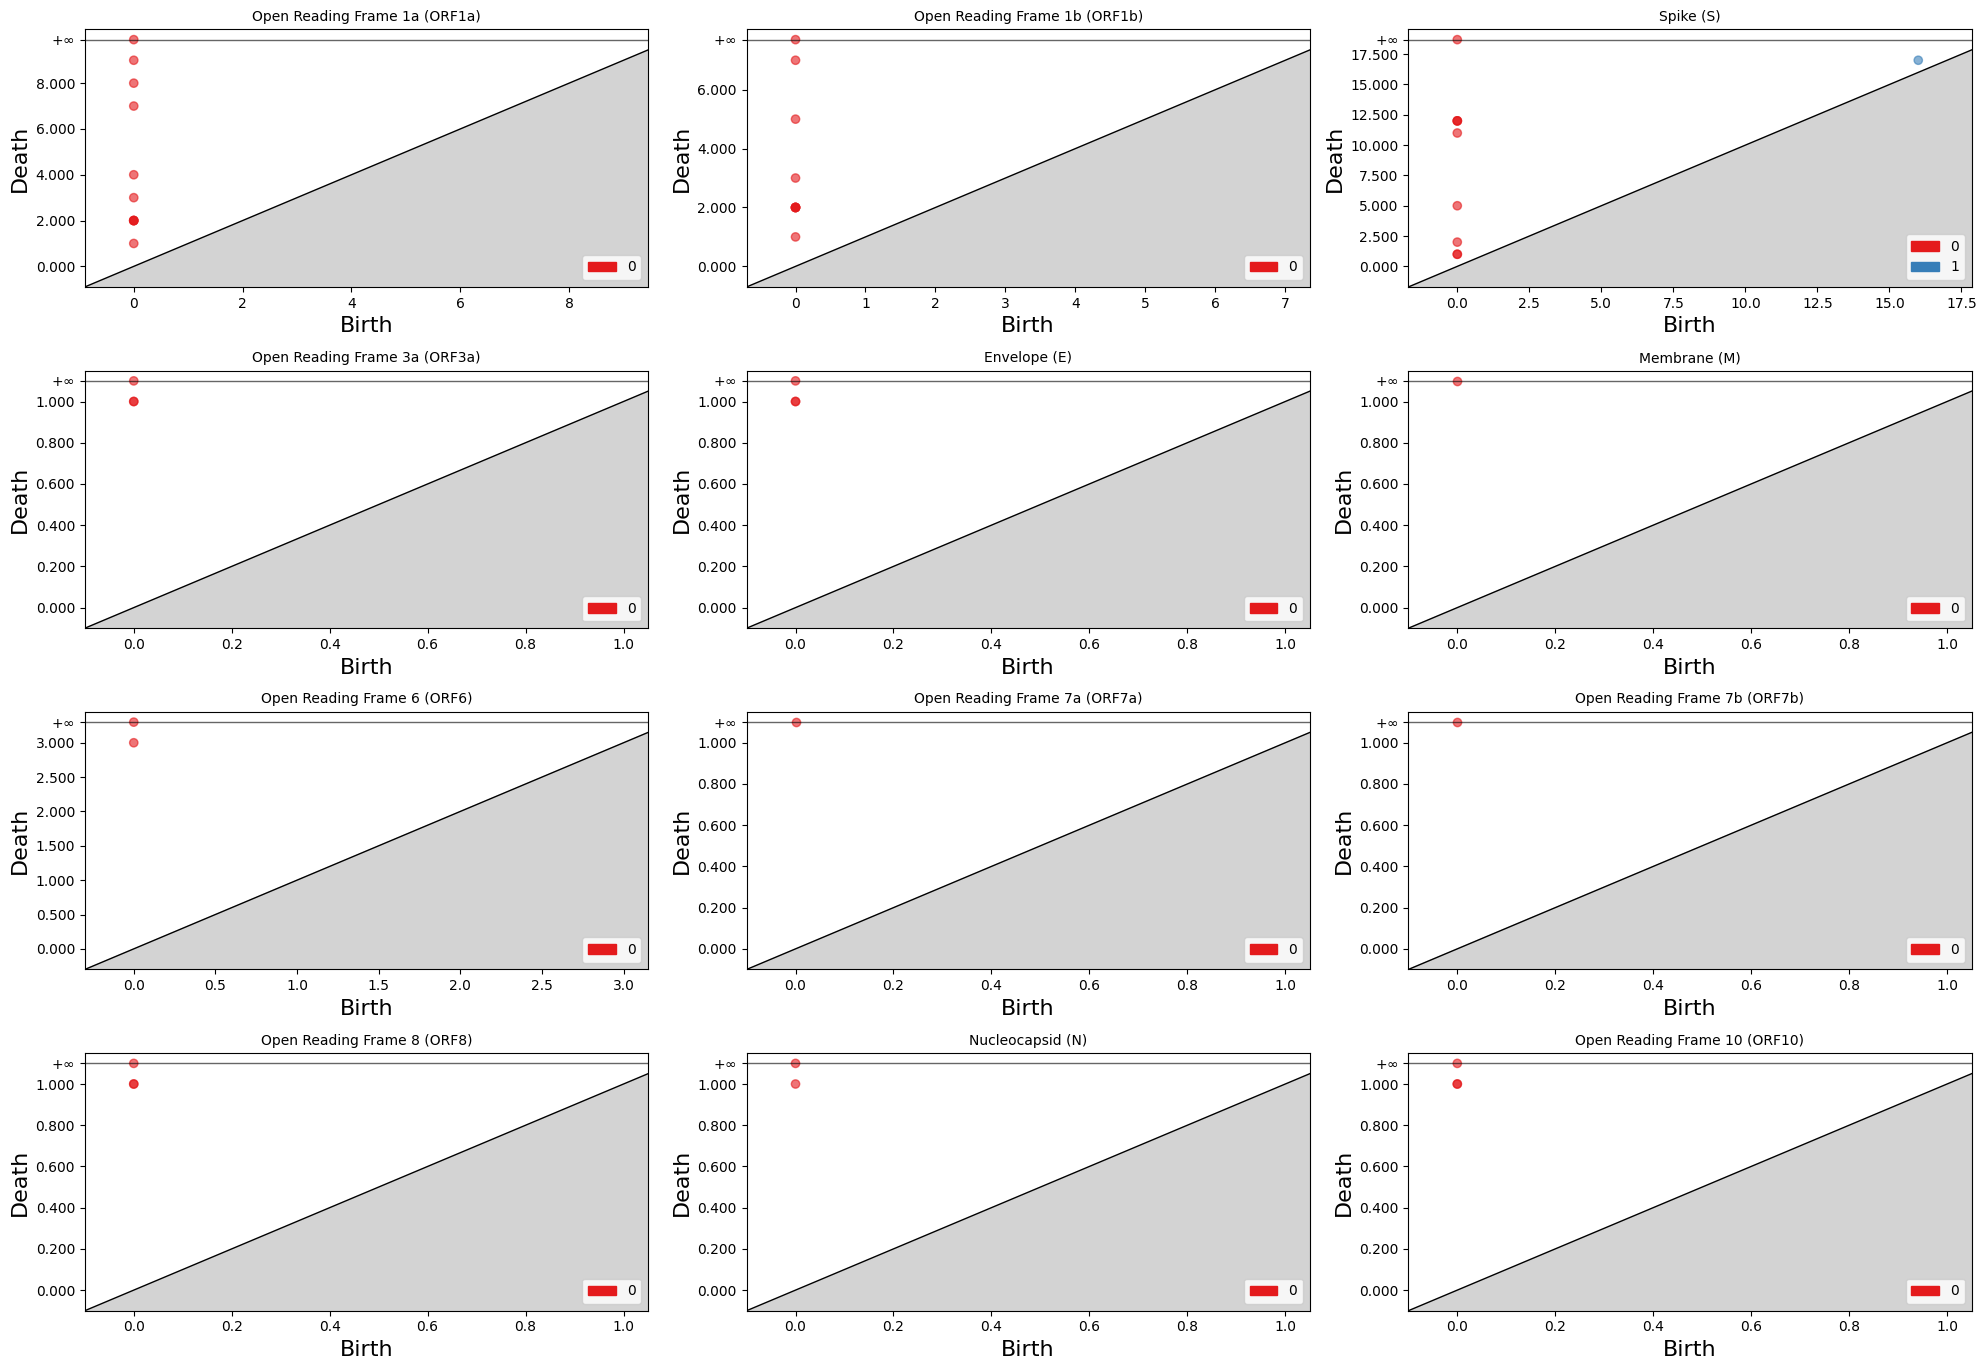

In [15]:
# Crea una figura grande
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(20, 15))

# Itera sobre cada matriz y grafica su diagrama de persistencia en un subplot
for i, dist_matrix in enumerate(matriz_vector):
    row = i // 3  # Fila del subplot
    col = i % 3   # Columna del subplot
    ax = axs[row, col]  # Obtiene el subplot correspondiente
    
    # Crea un RipsComplex para la matriz actual
    max_edge_length = 1000
    max_dimension = 3
    band = 0.0
    rips_complex = gudhi.RipsComplex(distance_matrix=dist_matrix, max_edge_length=max_edge_length)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=max_dimension)
    diag = simplex_tree.persistence()
    
    # Grafica el diagrama de persistencia en el subplot
    gudhi.plot_persistence_diagram(diag, axes=ax)
    ax.set_title(f'{proteinas_covid[i]}', fontsize=10, wrap=True)

# Ajusta el espaciado entre subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Muestra la figura
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Ajusta el layout para evitar superposiciones
plt.show()

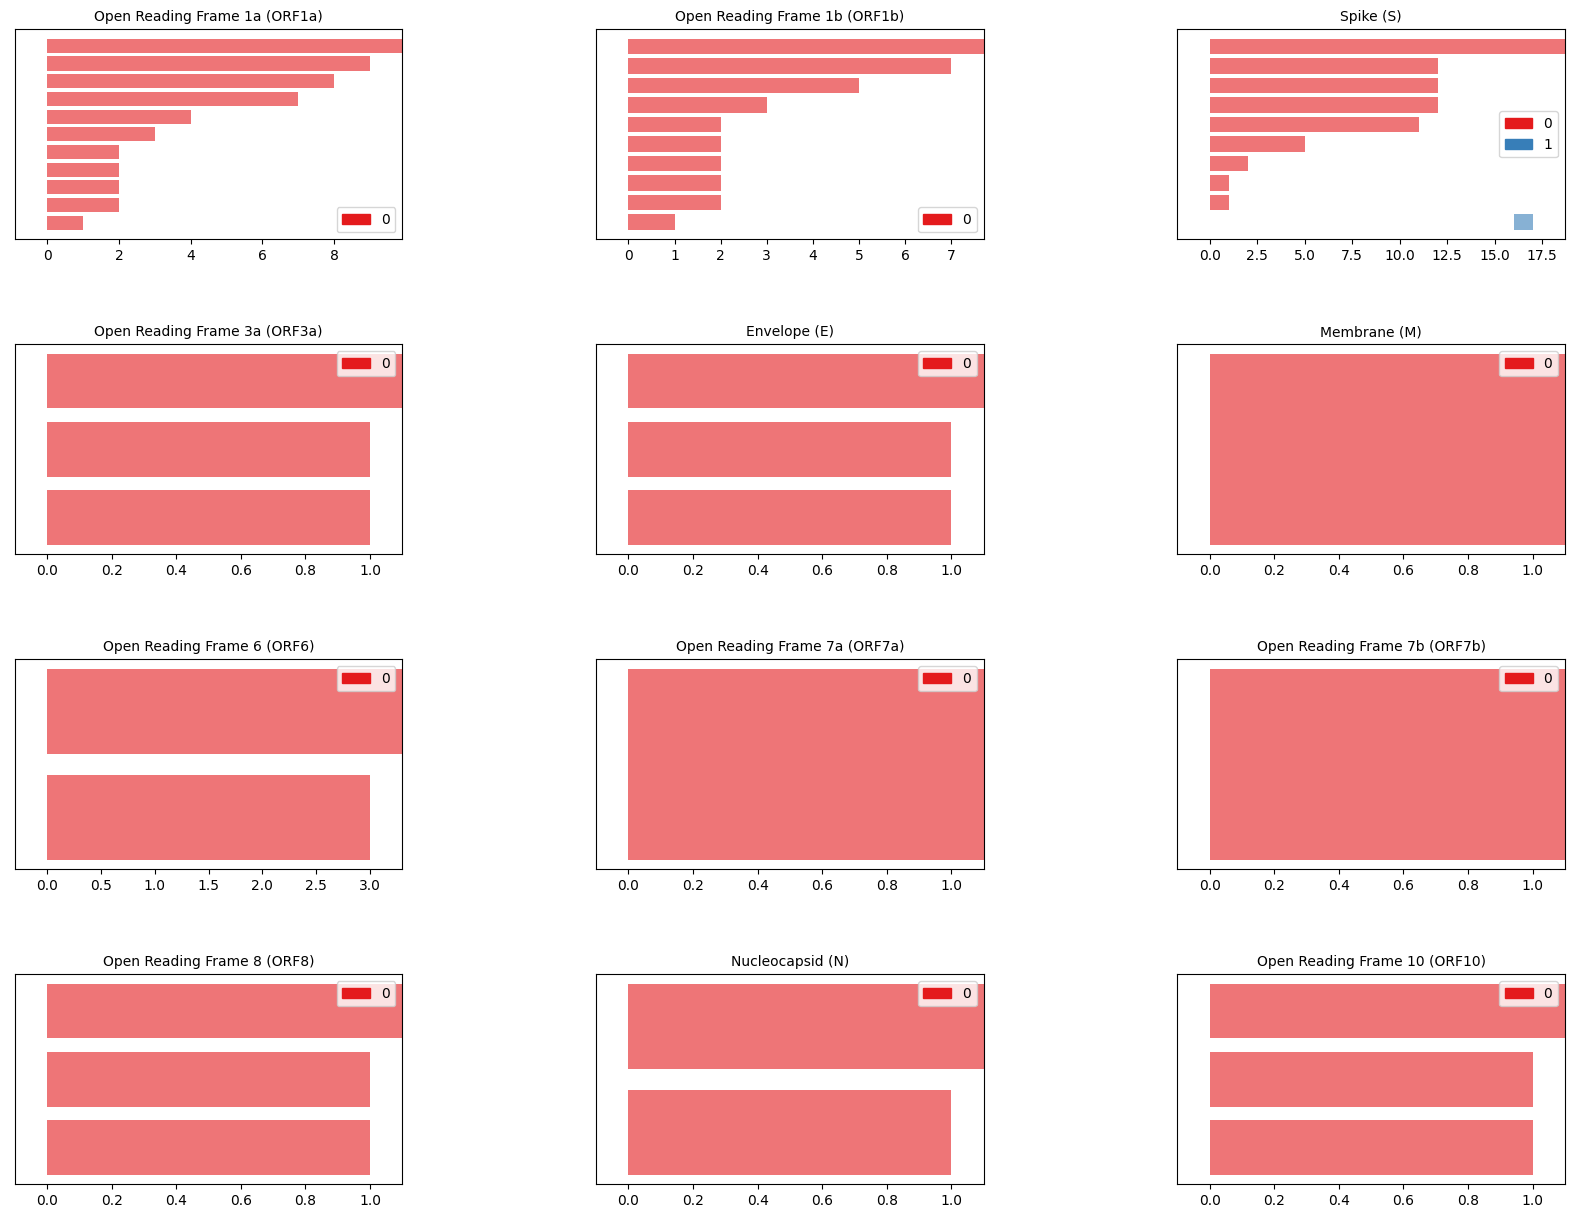

<Figure size 640x480 with 0 Axes>

In [16]:
# Crea una figura grande
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(20, 15))

# Itera sobre cada matriz y grafica su diagrama de persistencia en un subplot
for i, dist_matrix in enumerate(matriz_vector):
    row = i // 3  # Fila del subplot
    col = i % 3   # Columna del subplot
    ax = axs[row, col]  # Obtiene el subplot correspondiente
    
    # Crea un RipsComplex para la matriz actual
    max_edge_length = 360
    max_dimension = 3
    band = 0.0
    rips_complex = gudhi.RipsComplex(distance_matrix=dist_matrix, max_edge_length=max_edge_length)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=max_dimension)
    diag = simplex_tree.persistence()
    
    # Grafica el diagrama de persistencia en el subplot
    gudhi.plot_persistence_barcode(diag, axes=ax)
    ax.set_title(f'{proteinas_covid[i]}', fontsize=10, wrap=True)

# Ajusta el espaciado entre subplots
plt.subplots_adjust(hspace=0.5, wspace=0.5)

plt.savefig('codigo_barras_covid.png', dpi=300, bbox_inches='tight')

# Muestra la figura
plt.show()
plt.savefig('codigo_barras_covid_segmentos.png', dpi=300, bbox_inches='tight')